# Does linearization make a big difference?

We have tried out several models where it is simpler to linearize the model and use least-squares (or visual fitting or Chebyshev...) for several reasons.

Let's look at examples where we have the option to linearize vs. not linearize.

# Power-law model example

Let's consider the general power law model

$$ y = A x^n $$

with $n$ a fixed number and $A$ a free parameter. The example we looked at in Lab quiz 2 had $n=2$. 

Let there be $m$ data points $(x_i,y_i)$ and let this be the proposed model.

## Path 1: no linearization

The normal equation for $A$ when we don't linearize the model is

$$ A = \cfrac{\sum y_i x_i^n}{\sum x_i^{2n}} $$

see chapter 3.3 for derivation of this normal equation.

## Path 2: linearization

If we linearize the model, we get

$$ \ln y = \ln A + n \ln x $$

Let $A^* = \ln A$, $x^* = \ln x$, and $y^* = \ln y$. Then we have

$$ y^* = n x^* + A^* $$

So if we plot the linearized data, the slope should be a fixed number n and the intercept will determine the value of $A$.

Let's work out the normal equation for the free parameter $A^*$:

$$ \cfrac{\partial S}{\partial A^*} = \sum_{i=1}^m \frac{\partial}{\partial A^*} (y^*_i - n x^*_i - A^*)^2$$

$$ = \sum_{i=1}^m 2 (y^*_i - n x^*_i - A^*)(-1) = \sum_{i=1}^m -2 (y^*_i - n x^*_i - A^*)$$

Setting this equal to zero to minimize $S$ and dividing both sides by $-2$, we get

$$ 0 = \sum_{i=1}^m y^*_i - n \sum_{i=1}^m x^*_i - \sum_{i=1}^m A^* $$

$$ 0 = \sum_{i=1}^m y^*_i - n \sum_{i=1}^m x^*_i - m A^* $$

Therefore the normal equation for $A^*$ is

$$ A^* = \frac{n \sum_{i=1}^m x^*_i - \sum_{i=1}^m y^*_i}{-m} = \frac{\sum_{i=1}^m y^*_i - n \sum_{i=1}^m x^*_i}{m} $$

Since $A = e^{A^*}$, that means that

$$ A = \exp\left[ \frac{\sum_{i=1}^m y^*_i - n \sum_{i=1}^m x^*_i}{m} \right] $$

## Data from $y = 10 x^{0.33}$

Let's look at some noisy data generated from $y = 10 x^{0.33}$. Assume $n=0.33$ is known but not the coefficient out front. The data will be generated at 42 points from $x=0.1$ through $x=5.1$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

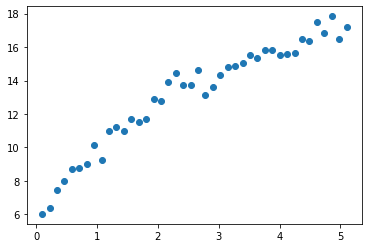

In [12]:
np.random.seed(101) # make sure random noise is the same every time you run the notebook
A1_true = 10
npow1 = 0.33 # known value of n
num1 = 42 # number of data points in data set
x1 = np.linspace(0.1,5.1,num=num1)
y1 = [A1_true * np.power(x, npow1) + 0.5*np.random.normal() for x in x1]
plt.plot(x1, y1, 'o');

## Path 1: direct method

In Path 1, let's calculate the coefficient using the direct normal equation

$$ A = \cfrac{\sum y_i x_i^n}{\sum x_i^{2n}} $$

Then we'll compute the sum of squared deviations (which should be minimized!)

I'll use for loops to calculate the sums

In [14]:
sum_y_i_x_i_n = 0.0 # initialize to zero
for i in range(0,num1): # this will sum over 1 to m
    sum_y_i_x_i_n += np.power(x1[i], npow1) * y1[i] 
print('Sum on i=1 to m of y_i * x_i^n =', sum_y_i_x_i_n)

sum_x_i_2n = 0.0 # initialize to zero
for i in range(0,num1): # this will sum over 1 to m
    sum_x_i_2n += np.power(x1[i], 2.*npow1)
print('Sum on i=1 to m of x_i^{2n} =', sum_x_i_2n)

Sum on i=1 to m of y_i * x_i^n = 759.4167716385151
Sum on i=1 to m of x_i^{2n} = 75.29276633388905


In [15]:
A_path_1 = sum_y_i_x_i_n / sum_x_i_2n
print('The least-squares estimate using the direct method for A is', A_path_1)

The least-squares estimate using the direct method for A is 10.086185016377913


### Making predictions with this value of A

Let's make a prediction using the computed value of A above. Then we'll compute the value of $S$ the sum of squared errors and see what its value is.

In [18]:
npred1 = 50
xpred1 = np.linspace(0,5.5,num=npred1) # 0 to 5.5 since data from 0.1 to 5.1
ypred1 = np.empty(npred1)
for i in range(0,npred1):
    ypred1[i] = A_path_1 * np.power(xpred1[i], n1)

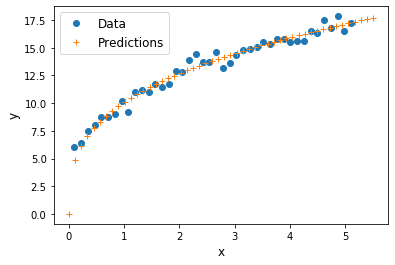

In [21]:
plt.plot(x1, y1, 'o', label='Data');
plt.plot(xpred1, ypred1, '+', label='Predictions');
plt.xlabel('x',fontsize=12);
plt.ylabel('y',fontsize=12);
plt.legend(fontsize=12);

### Compute the value of the sum of squared deviations

Let's now compute 

$$ S = \sum_{i=1}^m (y_i - A x_i^n)^2 $$

In [22]:
S1_path_1 = 0.0 #. initialize to zero
for i in range(0,num1):
    S1_path_1 += (y1[i] - A_path_1 * np.power(x1[i], n1))**2.0
print('The sum of squared deviations using the direct method is', '{:8.4f}'.format(S1_path_1))

The sum of squared deviations using the direct method is  11.5721


# Lab activity

Now do the same procedure as for the direct method, but compute $A$ using the linearized model, transform back, and compute the sum of squared errors $S$ for this method.

Which value of $S$ ends up being smaller?